In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

In [15]:
# Uploading data
# ==============================================================================

url = ('E:/María/GIS_DataManag_courses/Pest_Control_Data/table.csv')
datos = pd.read_csv(url, sep=',')
datos.head(4)

,time,latitude,longitude,temperature,temperature_C,DegreeDays,DegreeDays_ac,Zone
0,2022-04-10T12:00:00,1.052630,38.671875,311.56802,38,22.8,22.8,Zone A
1,2022-04-10T12:00:00,1.754383,38.671875,311.90005,21,22.8,45.6,Zone A
2,2022-04-11T12:00:00,1.052630,38.671875,311.13495,38,22.8,68.4,Zone A
3,2022-04-11T12:00:00,1.754383,38.671875,311.61150,38,22.8,91.2,Zone A


In [16]:
datos.groupby('Zone').size()


Zone
Zone A    27
Zone B    45
dtype: int64

In [17]:
# Hypothesis

#H0 : μ(Zone A) = μ(Zone B)
#Ha : μ(Zone A) ≠ μ(Zone B)

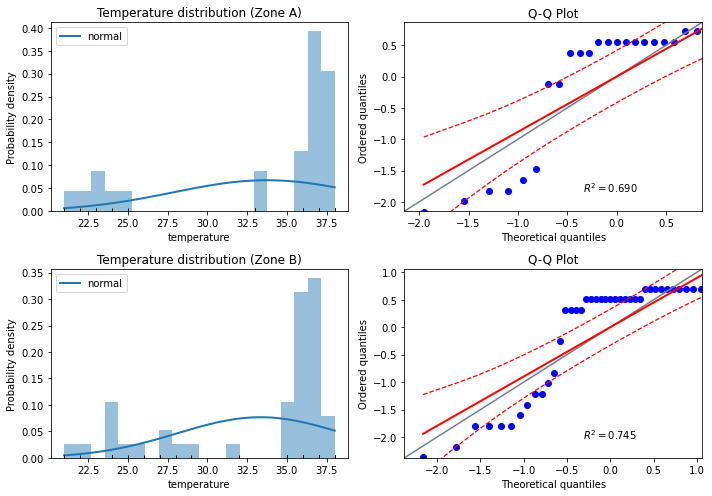

In [19]:
# Data distribution visualisation
# ==============================================================================

fig, axs = plt.subplots(2, 2, figsize=(10, 7))

########## Zone A ###########

tempA = datos.loc[datos.Zone == 'Zone A', 'temperature_C']

# Mean values (mu) and standard deviation values (sigma) of each group
mu, sigma = stats.norm.fit(tempA)

x_hat = np.linspace(min(tempA), max(tempA), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Graphs visualisation
axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=tempA, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(tempA, np.full_like(tempA, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Temperature distribution (Zone A)')
axs[0, 0].set_xlabel('temperature')
axs[0, 0].set_ylabel('Probability density')
axs[0, 0].legend()

# qq-plot graph to study the distribution of data.
pg.qqplot(tempA, dist='norm', ax=axs[0, 1])

############# Zone B ################

tempB = datos.loc[datos.Zone == 'Zone B', 'temperature_C']

# Mean values (mu) and standard deviation values (sigma) of each group
mu, sigma = stats.norm.fit(tempB)

x_hat = np.linspace(min(tempB), max(tempB), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Graphs visualisation
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=tempB, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(tempB, np.full_like(tempB, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Temperature distribution (Zone B)')
axs[1, 0].set_xlabel('temperature')
axs[1, 0].set_ylabel('Probability density')
axs[1, 0].legend()

# qq-plot graph to study the distribution of data.
pg.qqplot(tempB, dist='norm', ax=axs[1, 1])
plt.tight_layout();

In [21]:
# Shapiro-Wilk Normality Test
# ==============================================================================
pg.normality(data=datos, dv='temperature_C', group='Zone')

,W,pval,normal
Zone A,0.679433,2.032134e-06,False
Zone B,0.736999,1.263991e-07,False


In [22]:
# Q-Q plots are left-skewed.
# Shapiro-Wilk test provides significant evidence that none of the groups present normal distribution.

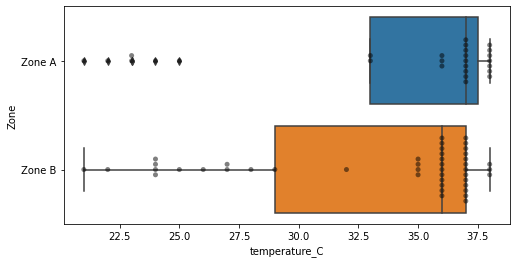

In [23]:
# Box plots to visualise group variances

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="Zone", x="temperature_C", data=datos, ax=ax)
sns.swarmplot(y="Zone", x="temperature_C", data=datos, color='black', alpha = 0.5, ax=ax);


In [24]:
# Levene Test: Homoscedasticity test to compare group variances
# ==============================================================================

pg.homoscedasticity(data=datos, dv='temperature_C', group='Zone')

,W,pval,equal_var
levene,0.046004,0.830791,True


In [ ]:
# Levene test provides evidence that both gropus aren't significantly different.
# In case they were different, a t-test should be conducted. 